<a href="https://colab.research.google.com/github/mjksill/CP540-online/blob/main/notebooks/Pandas_3_Importing_Data_from_Website.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Data from Websites

This worksheet will look at using pandas to import data from websites where csv have been uploaded, and build further on the manipulation of data we seen in the previous worksheet. Today we will use data from [here](https://data.open-power-system-data.org/renewable_power_plants/), which has multiple csv files for different countries showing their renewable energy power power plants and subsequent capacity. 

In [1]:
import pandas as pd
import io
 
All_countries = {'Germany' : 'DE',                          # We can create a dictionary for all the possible countries
                 'Denmark' : 'DK',
                 'France' : 'FR',
                 'Poland' : 'PL',
                 'United Kingdom' : 'UK',
                 'Switzerland' : 'CH',
                 'Sweden' : 'SE',
                 'Czech Republic' : 'CZ'}

Choosen_country = 'United Kingdom'                          # We can then define the country we want to look at
Country = All_countries[Choosen_country]                    # This assigns the country code, i.e. 'UK' to Country

URL = f'https://data.open-power-system-data.org/renewable_power_plants/2020-08-25/renewable_power_plants_{Country}.csv'
                                                            # This can then be used to pull the specific file we want from the website

df = pd.read_csv(URL, lineterminator='\n', skipinitialspace=True)
print(df)


      electrical_capacity energy_source_level_1 energy_source_level_2  \
0                     9.9      Renewable energy                 Hydro   
1                    19.5      Renewable energy                 Hydro   
2                    65.0      Renewable energy                 Hydro   
3                    32.0      Renewable energy                 Hydro   
4                    15.0      Renewable energy                 Hydro   
...                   ...                   ...                   ...   
2615                  0.5      Renewable energy                 Solar   
2616                  0.2      Renewable energy                 Solar   
2617                  0.4      Renewable energy                 Solar   
2618                  0.5      Renewable energy                 Solar   
2619                  5.0      Renewable energy                 Solar   

     energy_source_level_3                       technology data_source  \
0                      NaN  Other or unspecified

As we can see this is a large file with many columns that are either not important to us, or not filled with any data. Thus we should look to remove them. Looking at all the headings when opening the csv file, the only columns we want to keep are 'electrical_capacity', 'energy_source_level_2', 'region' and 'country'. Due to `pandas` indexing, these correspond to columns 0, 2, 14 and 15. So we can go ahead and remove all the other unrequired columns.

In [2]:
df = df.drop(df.columns[[1,3,4,5,6,7,8,9,10,11,12,13,16,17,18,19,20,21,22,23,24]], axis=1) 

print(df)

      electrical_capacity energy_source_level_2                region  \
0                     9.9                 Hydro                 Wales   
1                    19.5                 Hydro              Scotland   
2                    65.0                 Hydro              Scotland   
3                    32.0                 Hydro                 Wales   
4                    15.0                 Hydro              Scotland   
...                   ...                   ...                   ...   
2615                  0.5                 Solar            North West   
2616                  0.2                 Solar              Scotland   
2617                  0.4                 Solar               Eastern   
2618                  0.5                 Solar  Yorkshire and Humber   
2619                  5.0                 Solar                 Wales   

       country  
0        Wales  
1     Scotland  
2     Scotland  
3        Wales  
4     Scotland  
...        ...  
2615

Now we need to find all the regions where renewable energy plants are stationed in the UK. This can be done by collecting all the unique regions mentioned in the column and collecting them in a list. 

In [3]:
region = df.region.unique().tolist()                        # This collects all different regions in the column 'region' and puts them in a list for us to use
print(region)

['Wales', 'Scotland', 'London', 'East Midlands', 'North East', 'North West', 'Yorkshire and Humber', 'Eastern', 'Northern Ireland', 'West Midlands', 'South West', 'South East', 'Offshore', nan]


But wait. At the end of the list we can see there is a region called 'nan'. This isn't a region, it is what pandas puts at a point in the dataframe when there is missing or no data in the corresponding cell in the csv file. We could leave this in, but it's untidy, so it is better to remove it. 

In [4]:
df = df.dropna()                                            # This command will remove rows that are missing data in one or more columns

places = df.region.unique().tolist()                        # We can create a new list, where 'nan' isn't included
print(places)

['Wales', 'Scotland', 'London', 'East Midlands', 'North East', 'North West', 'Yorkshire and Humber', 'Eastern', 'Northern Ireland', 'West Midlands', 'South West', 'South East', 'Offshore']


Say we now want to find out how much electrical capcaity there is in each region of the UK from these renewable energy plants. We can use a similar method to that used last time when we were calculating the solar energy produced.

[4234.5, 9996.2, 288.19999999999993, 1639.2, 1224.8, 1108.3000000000002, 3950.9000000000005, 2298.5, 1426.2000000000003, 689.2999999999998, 3017.9, 2090.9, 9727.2]


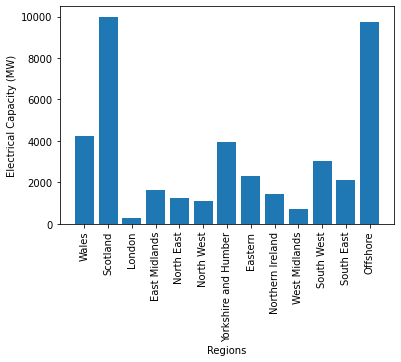

In [5]:
import pylab as plt
import numpy as np

sumcapacity = []                                            # Create an empty list to collect the summed capacity in

for i in places:
   sumcapacity.append((df.loc[df['region'] == i, 'electrical_capacity'].sum()))  # This makes use of the Boolean principles,
                                                                              # It will sum the electrical capcaity and deposit in the list created

print(sumcapacity)

height = sumcapacity                                        # We can then plot a bar graph to show this data
bars = places
y_pos = np.arange(len(bars))

# Create bars
plt.bar(y_pos, height)

# Create names on the x-axis
plt.xticks(y_pos, bars)
plt.xticks(rotation=90)

plt.xlabel('Regions')
plt.ylabel('Electrical Capacity (MW)')

# Show graphic
plt.show()

We can again use a pie chart to show the share of the UK's capacity between regions.

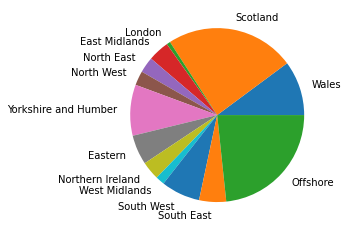

In [6]:
# Create a pieplot
plt.pie(sumcapacity, labels=places, labeldistance=1.15);

plt.show()

We can also apply filters to extract specific data from the dataframe. So for example, we can filter the data down to only renewable solar sources in Scotland, and find the total capacity for solar energy. 

In [7]:
is_scotland =  df['region']=='Scotland'                     # All the rows which contain 'Scotland' in the region column are collected
                                                          

df_scotland = df[is_scotland]                               # And a new dataframe is made which contains only these rows  
print(df_scotland)

is_solar = df_scotland['energy_source_level_2']=='Solar'    # We repeat this process, although this time we collect all the rows which contain 'solar' in the source column
df_scot_solar = df_scotland[is_solar]                       # And a new dataframe is created again
print(df_scot_solar)

Total = df_scot_solar['electrical_capacity'].sum()          # We can then sum the values in the second data frame created to find a total value for solar capacity
print(f'Scotlands electrical capacity from solar sources is {Total} MW')    # And then print this on the sheet


      electrical_capacity energy_source_level_2    region   country
1                    19.5                 Hydro  Scotland  Scotland
2                    65.0                 Hydro  Scotland  Scotland
4                    15.0                 Hydro  Scotland  Scotland
5                     8.0                 Hydro  Scotland  Scotland
6                     1.9                 Hydro  Scotland  Scotland
...                   ...                   ...       ...       ...
2588                 51.0                  Wind  Scotland  Scotland
2595                 10.0                  Wind  Scotland  Scotland
2599                 88.4                  Wind  Scotland  Scotland
2609                 29.9                  Wind  Scotland  Scotland
2616                  0.2                 Solar  Scotland  Scotland

[484 rows x 4 columns]
      electrical_capacity energy_source_level_2    region   country
1431                  1.6                 Solar  Scotland  Scotland
1703                  1.

A violin plot can be used to show the distribution of the capcaity of all the solar sources.

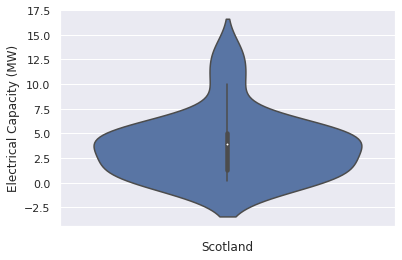

In [8]:
import seaborn as sns

sns.set(style="darkgrid")

 
# Make boxplot for one group only
ax = sns.violinplot(y=df_scot_solar["electrical_capacity"])
# ax = sns.violinplot(y=df_scot_solar["electrical_capacity"], cut =0)         # This line can be used in place of the one above, to give a graph showing no neg. values
ax.set_ylabel("Electrical Capacity (MW)")
ax.set_xlabel("Scotland")

plt.show()

Again, we see a negative range on this graph, but as explained in the previous worksheet this isn't negative values of data.

Say we now want to look at hydro plants in Scotland and their capacity. 

In [9]:
is_hydro = df_scotland['energy_source_level_2']=='Hydro'    
df_scot_hydro = df_scotland[is_hydro]                       


Total = df_scot_hydro['electrical_capacity'].sum()           
print(f'Scotlands electrical capacity from hydro sources is {Total} MW')    


Scotlands electrical capacity from hydro sources is 1292.0 MW


### Conclusion

We have looked at another dataset, and learnt more about filtering data out to find the results we want. We also now know how to import data directly from a csv file uploaded onto a website. 